### Import and prepare data

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# Load cleaned dataset
df = pd.read_csv("cleaned_reddit_posts.csv")
# Convert the column to datetime
df['created_date'] = pd.to_datetime(df['created_date'])
df['year_month'] = df['created_date'].dt.to_period('M')

In [20]:
# Define keywords
war_keywords = ['ukraine', 'russia', 'putin', 'zelensky', 'kyiv', 'moscow', 'invasion', 'donbas', 'crimea', 'nato']

In [21]:
# Filter posts 
# Lowercase titles for keyword matching
df['title_lower'] = df['title'].str.lower()

# Flag posts that mention any of the keywords
df['is_war_post'] = df['title_lower'].apply(lambda x: any(word in x for word in war_keywords))

# Filter only relevant posts
war_posts = df[df['is_war_post']]
print(f"Number of war-related posts: {len(war_posts)}")


Number of war-related posts: 127


### Posts over time

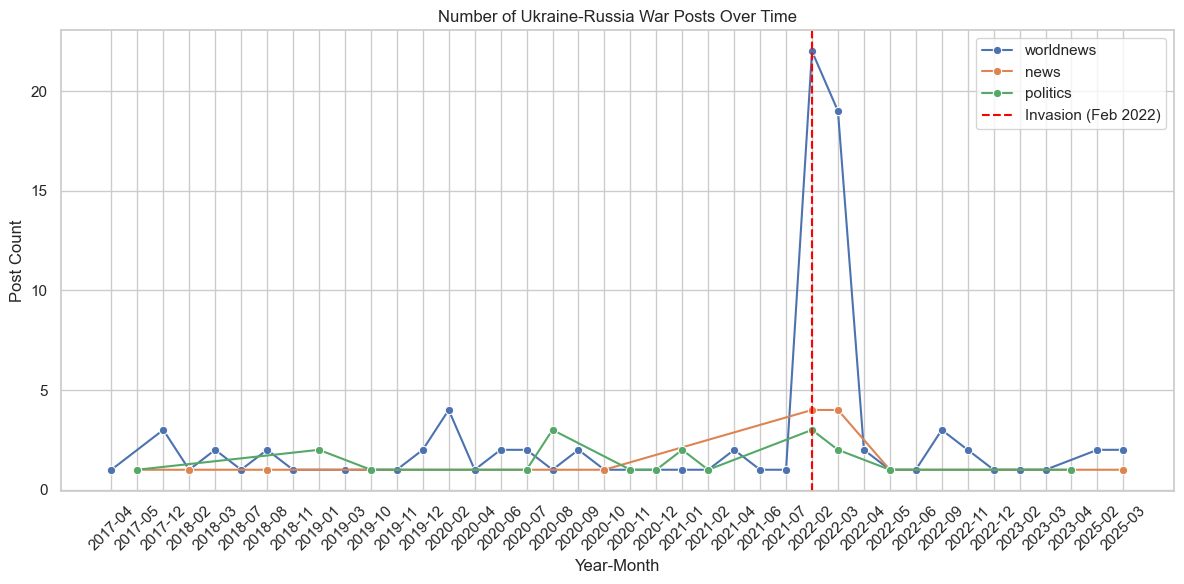

In [22]:
posts_by_time = war_posts.groupby(['year_month', 'subreddit']).size().reset_index(name='count')
posts_by_time['year_month'] = posts_by_time['year_month'].astype(str)
plt.figure(figsize=(12, 6))
sns.lineplot(data=posts_by_time, x='year_month', y='count', hue='subreddit', marker='o')
plt.xticks(rotation=45)
plt.title("Number of Ukraine-Russia War Posts Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Post Count")
plt.axvline(x='2022-02', color='red', linestyle='--', label='Invasion (Feb 2022)')
plt.legend()
plt.tight_layout()
plt.show()

### Compare Before vs After 2022

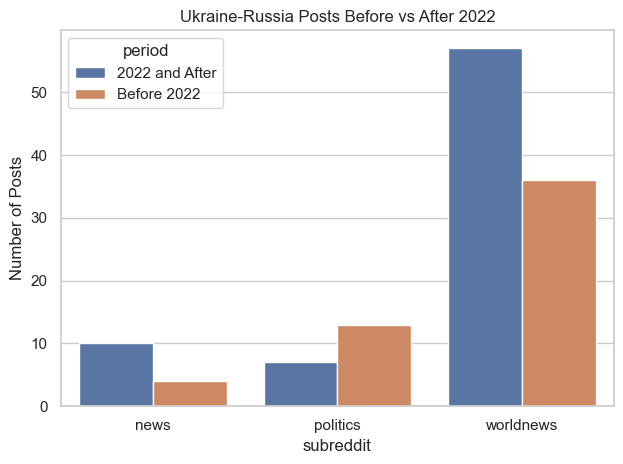

In [23]:
df_war = war_posts.copy()
df_war['period'] = df_war['created_date'].apply(lambda x: 'Before 2022' if x < pd.to_datetime("2022-01-01") else '2022 and After')

summary = df_war.groupby(['period', 'subreddit']).size().reset_index(name='count')

sns.barplot(data=summary, x='subreddit', y='count', hue='period')
plt.title("Ukraine-Russia Posts Before vs After 2022")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()


### Sentiment Analysis

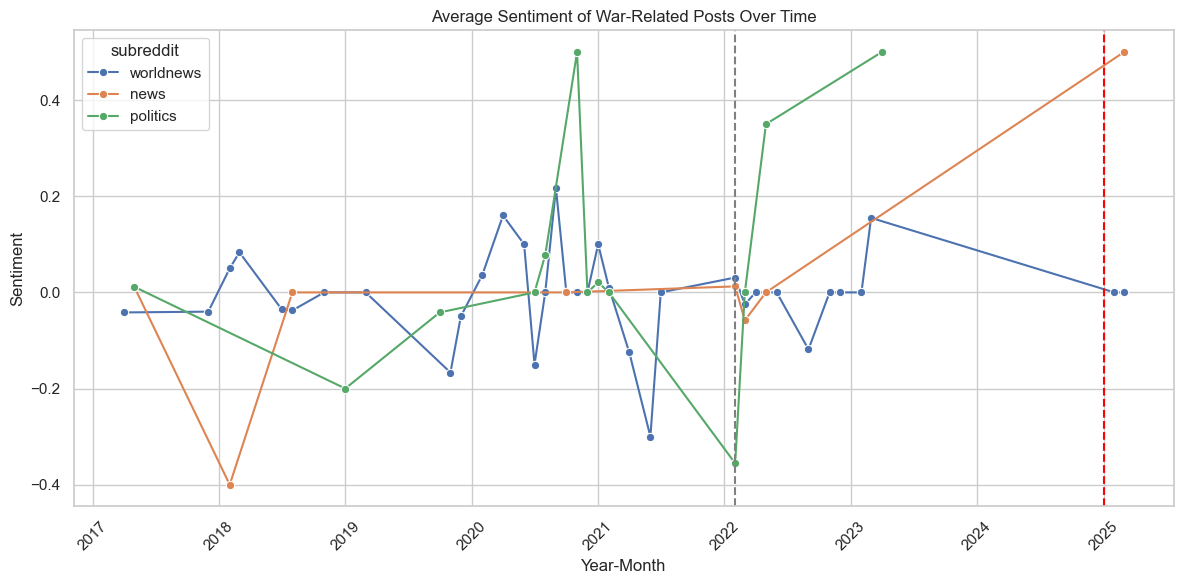

In [27]:
from textblob import TextBlob

df['sentiment'] = df['title'].apply(lambda x: TextBlob(x).sentiment.polarity)
war_posts = war_posts.copy()
war_posts['sentiment'] = df.loc[war_posts.index, 'sentiment']

# Average sentiment over time
avg_sentiment = war_posts.groupby(['year_month', 'subreddit'])['sentiment'].mean().reset_index()
avg_sentiment['year_month_dt'] = avg_sentiment['year_month'].dt.to_timestamp()
avg_sentiment['year_month'] = avg_sentiment['year_month'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_sentiment, x='year_month_dt', y='sentiment', hue='subreddit', marker='o')
plt.xticks(rotation=45)
plt.title("Average Sentiment of War-Related Posts Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Sentiment")
plt.axvline(pd.to_datetime('2022-02'), linestyle='--', color='gray', label='Full Invasion')
plt.axvline(pd.to_datetime('2025-01'), linestyle='--', color='red', label='Trump 2025')
plt.tight_layout()
plt.show()

In [28]:
war_posts[war_posts['subreddit'] == 'politics']['created_date'].max()


Timestamp('2023-04-07 13:03:50')